In [2]:
import tensorflow as tf
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.test.is_built_with_cuda()

True

# Importing Libraries

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os.path as op
import pickle

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model,Sequential,load_model
from keras.layers import Input, Embedding
from keras.layers import Dense, Bidirectional
from keras.layers.recurrent import LSTM
import keras.metrics as metrics
import itertools
from tensorflow.python.keras.utils.data_utils import Sequence
from decimal import Decimal
from keras import backend as K
from keras.layers import Conv1D,MaxPooling1D,Flatten,Dense

# Data Fetching

In [6]:
A1=np.empty((0,5),dtype='float32')
U1=np.empty((0,7),dtype='float32')
node=['150','149','147','144','142','140','136','61']
mon=['Apr','Mar','Aug','Jun','Jul','Sep','May','Oct']
for j in node:
  for i in mon:
    inp= pd.read_csv('data_gkv/AT510_Node_'+str(j)+'_'+str(i)+'19_OutputFile.csv',usecols=[1,2,3,15,16])
    out= pd.read_csv('data_gkv/AT510_Node_'+str(j)+'_'+str(i)+'19_OutputFile.csv',usecols=[5,6,7,8,17,18,19])
    
    inp=np.array(inp,dtype='float32')
    out=np.array(out,dtype='float32')
    
    A1=np.append(A1, inp, axis=0)
    U1=np.append(U1, out, axis=0)

print(A1)
print(U1)


[[1.50000e+02 1.90401e+05 7.25000e+02 2.75500e+01 8.03900e+01]
 [1.50000e+02 1.90401e+05 8.25000e+02 2.75600e+01 8.03300e+01]
 [1.50000e+02 1.90401e+05 9.25000e+02 2.75800e+01 8.02400e+01]
 ...
 [6.10000e+01 1.91020e+05 1.94532e+05 2.93700e+01 7.52100e+01]
 [6.10000e+01 1.91020e+05 1.94632e+05 2.93500e+01 7.52700e+01]
 [6.10000e+01 1.91020e+05 1.94732e+05 2.93400e+01 7.53000e+01]]
[[ 28.     3.   -52.   ...  16.97  19.63  20.06]
 [ 28.    15.   -53.   ...  16.63  19.57  23.06]
 [ 31.    16.   -55.   ...  17.24  19.98  20.24]
 ...
 [ 76.    12.   -76.   ...   3.47   3.95   4.35]
 [ 75.    13.   -76.   ...   3.88   4.33   4.42]
 [ 76.    12.   -75.   ...   3.46   4.07   4.28]]


# Min Max Scaler

In [7]:
from sklearn.preprocessing import MinMaxScaler
import warnings
scaler_obj=MinMaxScaler()
X1=scaler_obj.fit_transform(A1)
Y1=scaler_obj.fit_transform(U1)

warnings.filterwarnings(action='ignore', category=UserWarning)

X1=X1[:,np.newaxis,:]
Y1=Y1[:,np.newaxis,:]

In [8]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

# Model

In [9]:
model1 = Sequential()
model1.add(keras.Input(shape=(1,5)))
model1.add(tf.keras.layers.LSTM(7,activation="tanh",use_bias=True,kernel_initializer="glorot_uniform",bias_initializer="zeros"))
model1.add(Dense(7))
model1.add(keras.layers.BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,
                                beta_initializer="zeros",gamma_initializer="ones",
                                moving_mean_initializer="zeros",moving_variance_initializer="ones",trainable=True))
model1.add(keras.layers.ReLU())
model1.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss='binary_crossentropy',metrics=['accuracy','mse','mae',rmse])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7)                 364       
                                                                 
 dense (Dense)               (None, 7)                 56        
                                                                 
 batch_normalization (BatchN  (None, 7)                28        
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 7)                 0         
                                                                 
Total params: 448
Trainable params: 434
Non-trainable params: 14
_________________________________________________________________


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.25, random_state=42)

In [21]:
model_fit8 = model1.fit(x_train,y_train,batch_size=256,epochs=50, validation_split=0.1)

Epoch 1/50
4563/4563 [==============================] - 55s 12ms/step - loss: 0.0859 - accuracy: 0.9438 - mse: 1.8211e-04 - mae: 0.0047 - rmse: 0.0087 - val_loss: 0.0860 - val_accuracy: 0.9440 - val_mse: 1.8125e-04 - val_mae: 0.0047 - val_rmse: 0.0087
Epoch 2/50
4563/4563 [==============================] - 59s 13ms/step - loss: 0.0859 - accuracy: 0.9438 - mse: 1.8206e-04 - mae: 0.0047 - rmse: 0.0087 - val_loss: 0.0860 - val_accuracy: 0.9440 - val_mse: 1.8125e-04 - val_mae: 0.0047 - val_rmse: 0.0087
Epoch 3/50
4563/4563 [==============================] - 96s 21ms/step - loss: 0.0859 - accuracy: 0.9438 - mse: 1.8205e-04 - mae: 0.0047 - rmse: 0.0087 - val_loss: 0.0860 - val_accuracy: 0.9440 - val_mse: 1.8125e-04 - val_mae: 0.0047 - val_rmse: 0.0087
Epoch 4/50
4563/4563 [==============================] - 58s 13ms/step - loss: 0.0859 - accuracy: 0.9438 - mse: 1.8203e-04 - mae: 0.0047 - rmse: 0.0087 - val_loss: 0.0860 - val_accuracy: 0.9440 - val_mse: 1.8124e-04 - val_mae: 0.0047 - val_rmse:

4563/4563 [==============================] - 55s 12ms/step - loss: 0.0859 - accuracy: 0.9438 - mse: 1.8155e-04 - mae: 0.0047 - rmse: 0.0087 - val_loss: 0.0860 - val_accuracy: 0.9440 - val_mse: 1.8123e-04 - val_mae: 0.0047 - val_rmse: 0.0087
Epoch 34/50
4563/4563 [==============================] - 55s 12ms/step - loss: 0.0859 - accuracy: 0.9438 - mse: 1.8154e-04 - mae: 0.0047 - rmse: 0.0087 - val_loss: 0.0860 - val_accuracy: 0.9440 - val_mse: 1.8123e-04 - val_mae: 0.0047 - val_rmse: 0.0087
Epoch 35/50
4563/4563 [==============================] - 53s 12ms/step - loss: 0.0859 - accuracy: 0.9438 - mse: 1.8151e-04 - mae: 0.0047 - rmse: 0.0087 - val_loss: 0.0860 - val_accuracy: 0.9440 - val_mse: 1.8124e-04 - val_mae: 0.0047 - val_rmse: 0.0087
Epoch 36/50
4563/4563 [==============================] - 55s 12ms/step - loss: 0.0859 - accuracy: 0.9438 - mse: 1.8150e-04 - mae: 0.0047 - rmse: 0.0087 - val_loss: 0.0860 - val_accuracy: 0.9440 - val_mse: 1.8124e-04 - val_mae: 0.0047 - val_rmse: 0.0087


In [12]:
model1.evaluate(x_test,y_test)

13518/13518 [==============================] - 66s 5ms/step - loss: 0.0862 - accuracy: 0.9435 - mse: 1.8701e-04 - mae: 0.0047 - rmse: 0.0087


[0.08616957813501358,
 0.9434751272201538,
 0.0001870147680165246,
 0.004727136343717575,
 0.008726203814148903]

In [13]:
model1.evaluate(x_train,y_train)

40554/40554 [==============================] - 206s 5ms/step - loss: 0.0860 - accuracy: 0.9438 - mse: 1.8242e-04 - mae: 0.0047 - rmse: 0.0087


[0.08602557331323624,
 0.9438272714614868,
 0.0001824166247388348,
 0.004712733905762434,
 0.008702293038368225]

# Saving Model as File

In [22]:
model_json = model1.to_json()
with open("Model_File/lstm_tanh.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model1.save_weights("Model_File/lstm_tanh.h5")
print("Saved model to disk")

Saved model to disk


In [18]:
from keras.models import model_from_json
json_file = open('Model_File/lstm_tanh.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("Model_File/lstm_tanh.h5")
print("Loaded model from disk")
loaded_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy',metrics=['accuracy','mse','mae',rmse])

Loaded model from disk


# Error Analysis

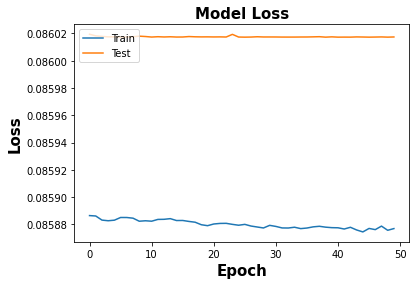

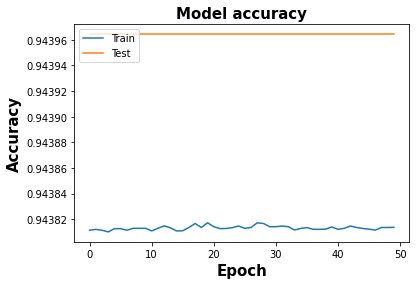

In [23]:
# summarize history for loss
plt.plot(model_fit8.history['loss'])
plt.plot(model_fit8.history['val_loss'])
plt.title('Model Loss',fontweight ='bold',fontsize = 15)
plt.ylabel('Loss',fontweight ='bold',fontsize = 15)
plt.xlabel('Epoch',fontweight ='bold',fontsize = 15)
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for accuracy
plt.plot(model_fit8.history['accuracy'])
plt.plot(model_fit8.history['val_accuracy'])
plt.title('Model accuracy',fontweight ='bold',fontsize = 15)
plt.ylabel('Accuracy',fontweight ='bold',fontsize = 15)
plt.xlabel('Epoch',fontweight ='bold',fontsize = 15)
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.25, random_state=42)

y_test_pred=loaded_model.predict(x_test)
y_test_pred

array([[0.        , 0.06553665, 0.        , ..., 0.01973882, 0.01233712,
        0.00420575],
       [0.        , 0.06553665, 0.        , ..., 0.        , 0.01233712,
        0.00439085],
       [0.        , 0.06553665, 0.        , ..., 0.        , 0.01233712,
        0.00480377],
       ...,
       [0.        , 0.06553665, 0.        , ..., 0.        , 0.01233712,
        0.00472949],
       [0.        , 0.06553665, 0.        , ..., 0.01976034, 0.01233712,
        0.004535  ],
       [0.        , 0.06553665, 0.        , ..., 0.        , 0.01233712,
        0.00450286]], dtype=float32)

In [25]:
y_test

array([[[0.00011559, 0.06553685, 0.00011085, ..., 0.0021448 ,
         0.0014142 , 0.00052142]],

       [[0.00011088, 0.06553695, 0.00012144, ..., 0.01090628,
         0.00639894, 0.00234271]],

       [[0.0001138 , 0.06553686, 0.00011756, ..., 0.02938369,
         0.01855402, 0.00761428]],

       ...,

       [[0.00011103, 0.06553663, 0.00011547, ..., 0.05674056,
         0.03595096, 0.01243099]],

       [[0.00011477, 0.06553688, 0.00010965, ..., 0.00815022,
         0.00468672, 0.00148292]],

       [[0.00010879, 0.06553657, 0.00012025, ..., 0.00375339,
         0.00246608, 0.00081172]]], dtype=float32)

In [26]:
y_test=y_test[:,0]

In [28]:
from numpy import savetxt
savetxt('ARRAY_DATA/lstm_y_test_pred.csv', y_test_pred[:1001], delimiter=',')

In [29]:
from numpy import savetxt
savetxt('ARRAY_DATA/lstm_y_test.csv', y_test[:1001], delimiter=',')

In [ ]:
#completed